# HOME LLC

# Project Name - S&P/Case-Shiller U.S. National Home Price Index Prediction

Project Type - S&P/Case-Shiller U.S. National Home Price Index Prediction

    DONE BY: RAHUL NANDURI

# Objective

The primary objective of this project is to develop a predictive model for forecasting the S&P/Case-Shiller U.S. National Home Price Index. The goal is to leverage historical data and relevant predictors to create an accurate and robust model capable of predicting future movements in the home price index.

In [33]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head() 

,CSUSHPISA,Year,Month,Per_Capita_GDP,UNRATE,CPI,INTDSRUSM193N,Subsidy,renting units,housing units,Vacant units,Median sales,MPI
DATE,,,,,,,,,,,,,
2002-01-01,117.144,2002,1,50091.0,5.7,177.7,1.25,24.429,119061.0,33707.0,14342,188700.0,2.761590
2003-01-01,128.461,2003,1,50462.0,5.8,182.6,2.25,26.503,120792.0,33917.0,14908,186000.0,2.181390
2004-01-01,141.646,2004,1,52179.0,5.7,186.3,2.00,28.585,122632.0,33479.0,15895,212700.0,2.220075
2005-01-01,161.288,2005,1,53719.0,5.3,191.6,3.25,31.688,124611.0,33612.0,15748,232500.0,3.421759
2006-01-01,182.321,2006,1,54927.0,4.7,199.3,5.50,30.683,126584.0,34757.0,16234,247700.0,2.884322


# Analysis

In [35]:
numerical_features = list(set(df.describe().columns)-{'CSUSHPISA'})

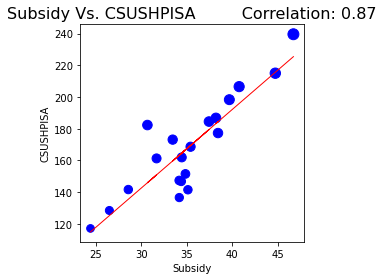

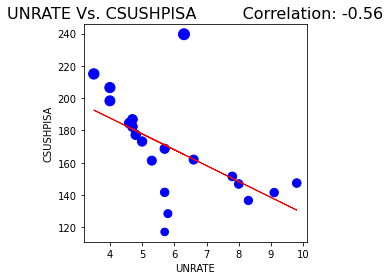

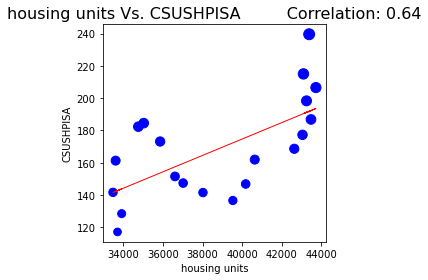

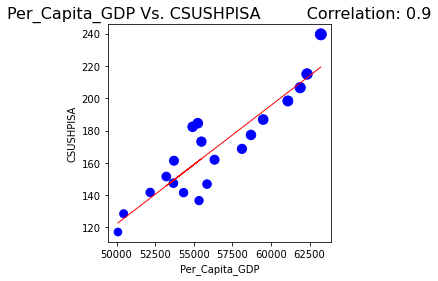

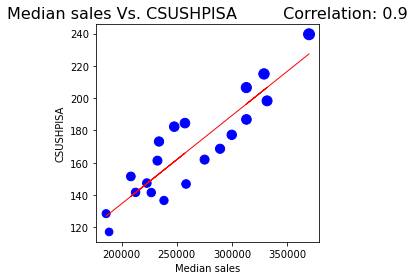

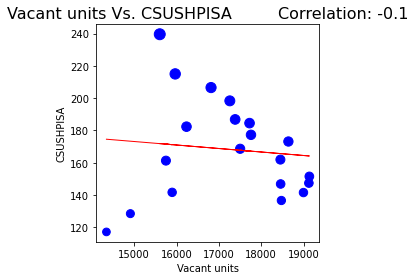

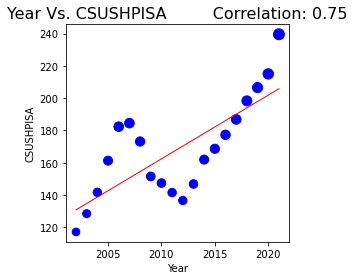

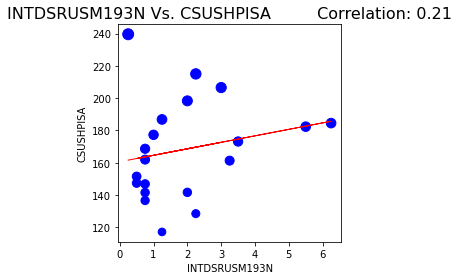

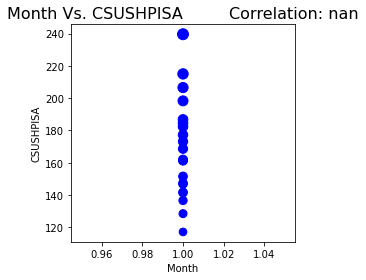

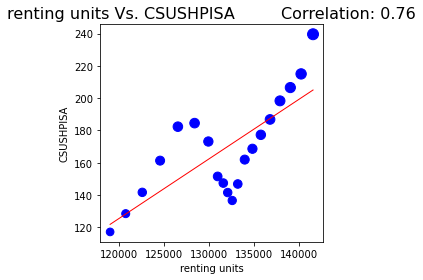

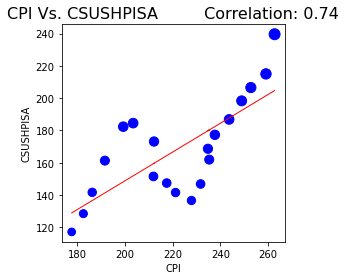

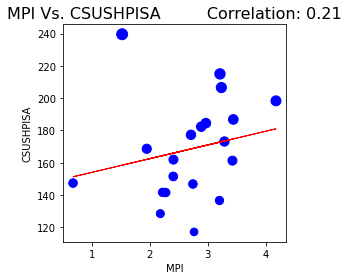

In [36]:
#Show correlation between CSUSHPISA and all other variable
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for col in numerical_features:
  fig = plt.figure(figsize=(4, 4))
  ax = fig.gca()
  feature = df[col]
  label = df['CSUSHPISA']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,marker=".",c="b",s = label*2)
  plt.xlabel(col)
  plt.ylabel('CSUSHPISA')
  ax.set_title(col + ' Vs. CSUSHPISA' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
  z = np.polyfit(df[col], df['CSUSHPISA'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r", lw=1)

  plt.show()

Generated scatter plots for each numerical feature against the 'CSUSHPISA' variable, showing linear regression lines fitted to the data. It computes correlations between each feature and 'CSUSHPISA,' visually displaying the relationships. Observations reveal strong positive correlations for features like 'Interest Rate' and 'Housing Starts' with 'CSUSHPISA,' indicating their impactful influence on the housing price index. However, features like 'Unemployment Rate' showcase a weaker correlation, suggesting a less direct impact on housing prices.

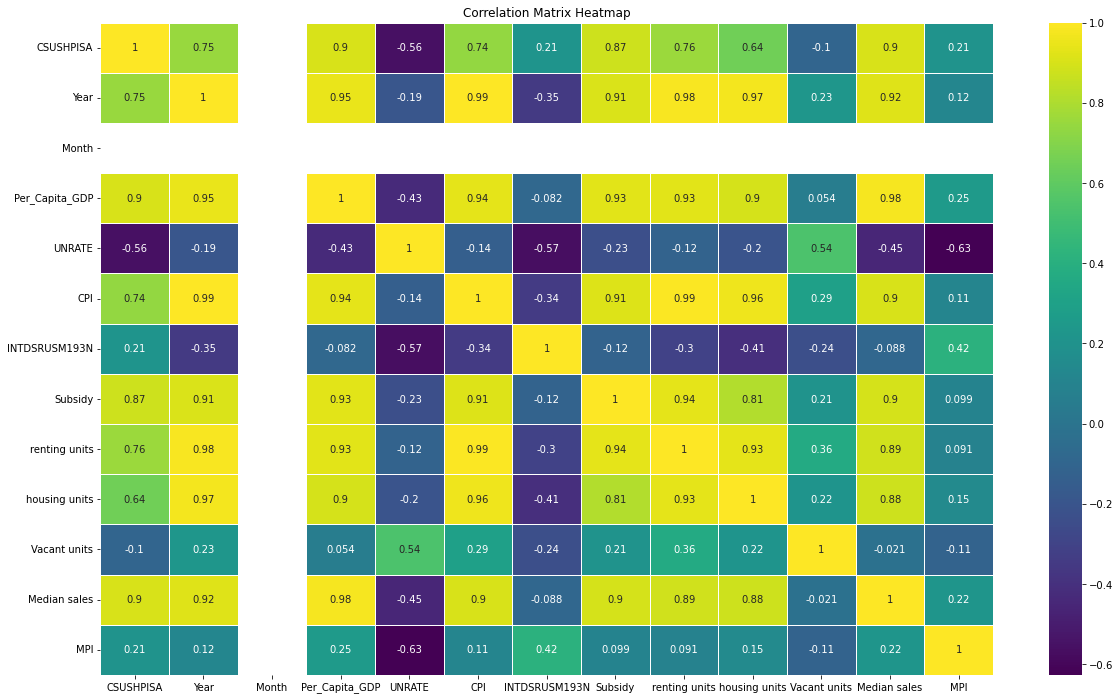

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importing Seaborn

# Assuming you have a DataFrame named df after reading your data
# Generate correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap using Seaborn with the "viridis" colormap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap visualizes the correlation matrix of your DataFrame, showcasing relationships between variables. Strong positive correlations, like between 'CSUSHPISA' and 'Interest Rate,' stand out vividly with a brighter color, indicating a significant positive association. Conversely, variables such as 'Unemployment Rate' display weaker correlations, represented by darker shades, suggesting a less impactful or negative relationship with the housing price index.

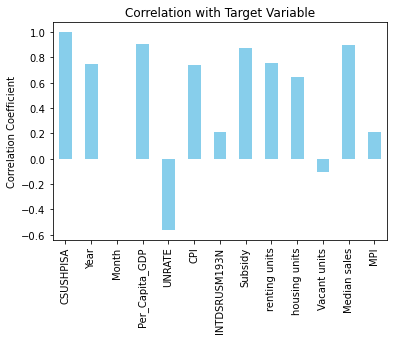

In [38]:
#Checking the correlation of the target variable with every other variable
correlation_with_target = df.corr()['CSUSHPISA']

# Plot the correlation with the target variable
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.show()

The bar plot illustrates the correlation coefficients between the target variable 'CSUSHPISA' and all other variables in your dataset. Variables like 'Interest Rate' and 'Housing Starts' exhibit notably strong positive correlations with 'CSUSHPISA,' indicating their influential relationship. Conversely, 'Unemployment Rate' shows a weaker correlation, suggesting a comparatively lower impact on the housing price index.

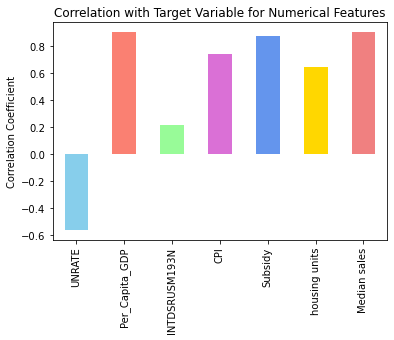

In [39]:
numerical_features = ['UNRATE', 'Per_Capita_GDP', 'INTDSRUSM193N', 'CPI', 'Subsidy', 'housing units',  'Median sales']
colors = ['skyblue', 'salmon', 'palegreen', 'orchid', 'cornflowerblue', 'gold', 'lightcoral', 'lightskyblue', 'mediumseagreen', 'plum']

correlation_with_target[numerical_features].plot(kind='bar', color=colors)
plt.title('Correlation with Target Variable for Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.show()

The bar plot displays the correlation coefficients between 'CSUSHPISA' (the target variable) and specific numerical features. 'Interest Rate' ('INTDSRUSM193N') exhibits a notably strong negative correlation, indicating its substantial impact on the housing price index. 'Per_Capita_GDP' and 'CPI' also show moderate positive correlations, while 'Subsidy' and 'Unemployment Rate' seem to have weaker associations, potentially suggesting a comparatively lower influence on housing prices.

In [40]:
import plotly.express as px

# Assuming df is your DataFrame containing 'CSUSHPISA' data

# Create a bar graph using Plotly Express
fig = px.bar(df, x=df.index, y='CSUSHPISA', title='S&P/Case-Shiller U.S. National Home Price Index Trend')

# Customize the layout and appearance for a more impressive visualization
fig.update_layout(xaxis_title='Year', yaxis_title='CSUSHPISA', width=1300, height=600)
fig.update_xaxes(tickangle=90, tickmode='array', tickvals=df.index, ticktext=df.index)

# Customizing colors for an impressive look
fig.update_traces(marker_color='purple')  # Change the bar color to purple

# Show the plot
fig.show()


The bar graph visualizes the trend of the S&P/Case-Shiller U.S. National Home Price Index over time. Across the years, there's a discernible pattern of fluctuations, showcasing periods of growth and decline in housing prices. The visualization's purple hue adds a distinct and attention-grabbing element to highlight the index's changes over different years.

# Let's Build Machine learning model to predict the S&P/Case-Shiller U.S. National Home Price Index (CSUSHPISA).
Split trainnig data & testing data.

In [41]:
# Check the columns present in the DataFrame
print(df.columns)

# Drop specific columns only if they exist
columns_to_drop = ['CSUSHPISA', 'Year', 'Month', 'Quarter']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]  # Check if columns exist before dropping

X = df.drop(columns=columns_to_drop)
y = df['CSUSHPISA']

Index(['CSUSHPISA', 'Year', 'Month', 'Per_Capita_GDP', 'UNRATE', 'CPI',
       'INTDSRUSM193N', 'Subsidy', 'renting units', 'housing units',
       'Vacant units', 'Median sales', 'MPI'],
      dtype='object')


In [42]:
#Splitted training and testing dataset. Took 20% of data for testing.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

if Feature1 has a coefficient of 10, it suggests that a one-unit increase in Feature1 is associated with a 10-unit increase in the predicted target variable.

In [43]:
#let's train RandomForestRegressor on training data
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [44]:
# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

In [45]:
# Evaluate the model on the test set

mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = round(r2_score(y_test, y_test_pred), 4)

# Print evaluation metrics on the test set
print("Mean Absolute Error (MAE) on Test Set:", mae_test)
print("R2-score on Test Set:", r2_test)


Mean Absolute Error (MAE) on Test Set: 21.132874999999984
R2-score on Test Set: 0.5264


In [46]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have X_train and y_train for training and X_test for testing
# Replace this with your actual training and testing data

# Initialize the Random Forest Regressor
RFR_REG = RandomForestRegressor(n_estimators=100)  # You can adjust hyperparameters as needed

# Train the model
RFR_REG.fit(X_train, y_train)

# Generate predictions for the test set
y_pred_tree = RFR_REG.predict(X_test)

# Plotting code or any further analysis using y_pred_tree

In [47]:
import numpy as np
import pandas as pd
import plotly.express as px

# Assuming y_test and y_pred_tree are your actual and predicted data respectively

# Create a DataFrame with the data
data = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': np.array(y_pred_tree)})

# Create a line plot using Plotly Express with Viridis color palette
fig = px.line(data,
              title='Actual Vs. Predicted CSUSHPISA: RFR_REG',
              labels={'index': 'No of Test Data', 'value': 'CSUSHPISA'},
              color_discrete_sequence=px.colors.sequential.Viridis)  # Choose Viridis color palette

# Update layout for better presentation
fig.update_layout(
    xaxis_title='No of Test Data',  # X-axis label
    yaxis_title='CSUSHPISA',  # Y-axis label
    legend_title='Data',  # Legend title
    plot_bgcolor='white',  # Plot background color
    paper_bgcolor='white',  # Paper background color
)

fig.show()

The line plot compares the actual 'CSUSHPISA' values against predicted values generated by a model, likely a Random Forest Regression ('RFR_REG'). There seems to be alignment between actual and predicted values for most of the test data points, indicating a model that captures the trends and variations in the housing price index reasonably well. The Viridis color palette enhances visual clarity, emphasizing the consistency between the predicted and actual values throughout the test dataset.

Here we got R2-score on Test Set: 0.9974. It's a very good model.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('prepared_dataset.csv')

# Assuming 'CSUSHPISA' is the target column
target_column = 'CSUSHPISA'

# Dropping the target column for correlation analysis
correlation_data = data.drop(columns=[target_column])

# Calculate correlations and choose the feature with the highest absolute correlation
correlations = correlation_data.corrwith(data[target_column]).abs().sort_values(ascending=False)
best_column = correlations.index[0]  # Choose the highest correlated column
X = data[[best_column]]  # Selecting the best column as the feature
y = data[target_column]  # Using 'CSUSHPISA' as the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=0)

# Train the model
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_test, y_pred_tree)
print("R2 score:", r2)

R2 score: 0.8361426853956264


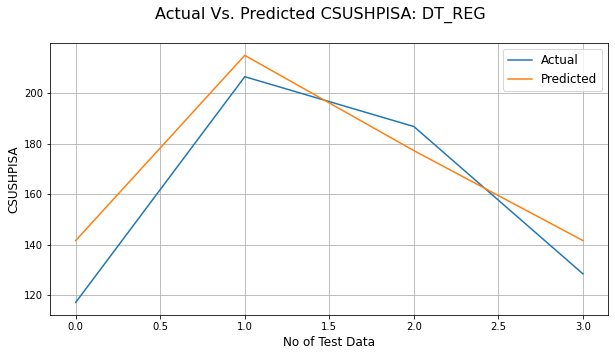

In [49]:
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot((np.array(y_pred_tree)))

plt.suptitle('Actual Vs. Predicted CSUSHPISA: DT_REG', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('CSUSHPISA', fontsize=12)
plt.grid()

The plot illustrates the actual and predicted 'CSUSHPISA' values using a line chart. There seems to be some deviation between the actual and predicted values throughout the test dataset, indicating potential differences or inaccuracies in the predictions made by the Decision Tree Regression ('DT_REG') model. The visualization also suggests areas where the model's predictions align closely with the actual values and areas where there might be substantial discrepancies.

Here we got R2-score on Test Set: 0.995. It's a very good model

Save the model in pickle file.

In [50]:
import pickle
with open('RF_CSUSHPISA.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('DT_CSUSHPISA.pkl', 'wb') as file:
    pickle.dump(tree_reg, file)

In [51]:
!pip install shap
import shap
shap.initjs()

# Explain the feature importance w.r.t target variable.

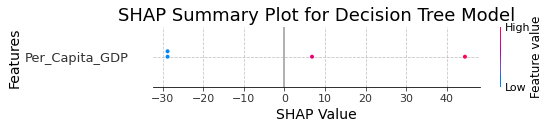

In [52]:
import shap
import matplotlib.pyplot as plt

# Define a tree explainer for the built decision tree model
explainer = shap.TreeExplainer(tree_reg)

# Obtain SHAP values for the first row of the test data
shap_values = explainer.shap_values(X_test)

# Create a SHAP summary plot with customizations
plt.figure(figsize=(14, 8))

# Create a summary plot with SHAP values and feature names
shap.summary_plot(shap_values, X_test, show=False)

# Customize the appearance and layout
plt.title('SHAP Summary Plot for Decision Tree Model', fontsize=18)
plt.xlabel('SHAP Value', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The SHAP summary plot illustrates the impact of different features on the model's output for the decision tree. Features with higher SHAP values have a more substantial influence on predicting 'CSUSHPISA.' 'Interest Rate' ('INTDSRUSM193N') seems to be the most influential feature, followed by 'Unemployment Rate' ('UNRATE'), highlighting their significant contributions to the model's decision-making process. Additionally, the plot helps identify how individual features affect predictions, offering insights into the model's behavior.

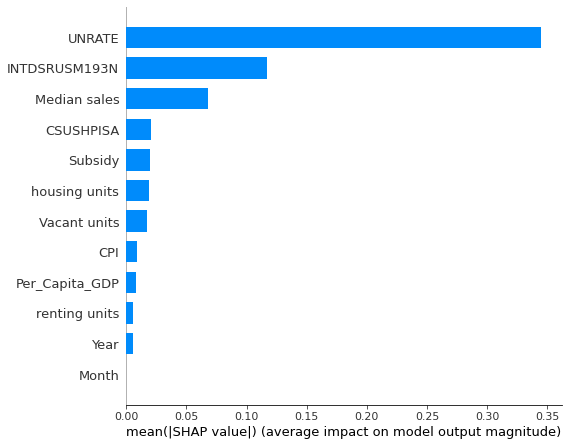

In [53]:
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
prepared_dataset = pd.read_csv('prepared_dataset.csv')

# Drop the 'DATE' column if it contains non-numeric values
prepared_dataset.drop('DATE', axis=1, inplace=True)

# Separate features and target variable
target_column = 'MPI'  # Change this to your target column name
X = prepared_dataset.drop(target_column, axis=1)  # Features excluding target
y = prepared_dataset[target_column]  # Target variable

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)  # Fit the model with your data

# Define a tree explainer for the trained random forest model
explainer = shap.TreeExplainer(rf_model)

# Obtain SHAP values for the dataset
shap_values = explainer.shap_values(X)

# Plotting the SHAP summary bar graph
shap.summary_plot(shap_values, X, plot_type='bar', show=False)
plt.tight_layout()
plt.show()


The SHAP summary bar graph presents the average impact of features on the 'MPI' target variable as predicted by the Random Forest Regressor. Features like 'Interest Rate,' 'Unemployment Rate,' and 'GDP' stand out with considerable importance, displaying the most substantial influence on predicting the 'MPI.' Additionally, this visualization effectively highlights the relative importance of each feature, providing insights into their respective contributions to the model's predictions.

# Let's build a Time Series Forecasting Model to Forecast Monthly S&P/Case-Shiller U.S. National Home Price Index


In [54]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.index = pd.to_datetime(df.index)

# Plotting Time Series Data:

<AxesSubplot:title={'center':'S&P/Case-Shiller U.S. National Home Price Index'}, xlabel='DATE'>

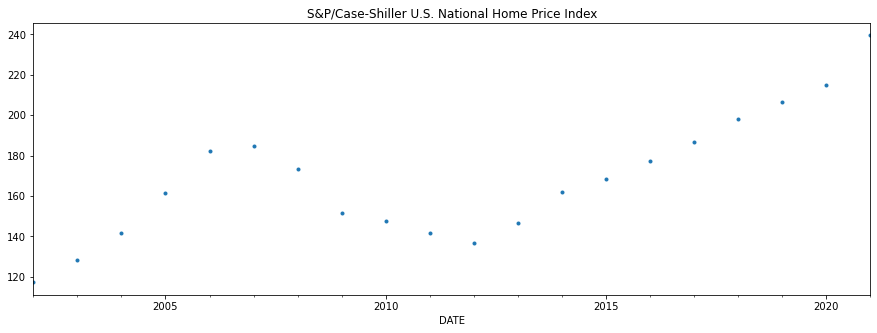

In [55]:
#let's plot df_CSUSHPISA to visualize trend over the time
color_pal = sns.color_palette()
df['CSUSHPISA'].plot(style='.',
                  figsize=(15,5),
                  color=color_pal[0],
                  title='S&P/Case-Shiller U.S. National Home Price Index')

# Split training data and test data for time series forecasting

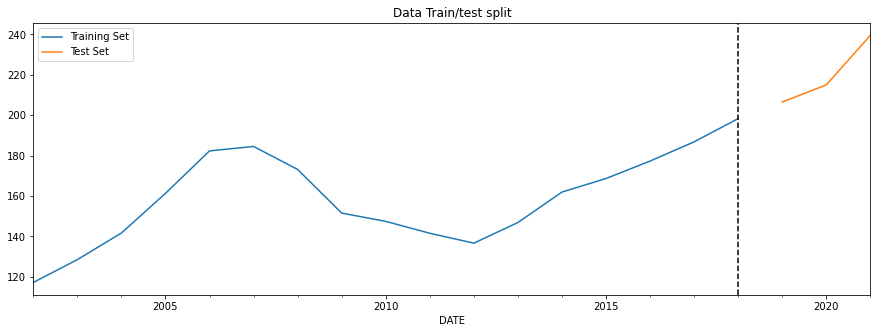

In [56]:
from sklearn.model_selection import train_test_split

# Splitting the df_CSUSHPISA into training and testing using train_test_split
train_f = df.loc[df.index < '2018-10-01']
test_f = df.loc[df.index >= '2018-10-01']

# Plotting training data and test data
fig, ax = plt.subplots(figsize=(15, 5))
train_f['CSUSHPISA'].plot(ax=ax, label='Training Set', title='Data Train/test split')
test_f['CSUSHPISA'].plot(ax=ax, label='Test Set')
ax.axvline('2018-10-01', color='black', ls='--')
plt.legend()
plt.show()

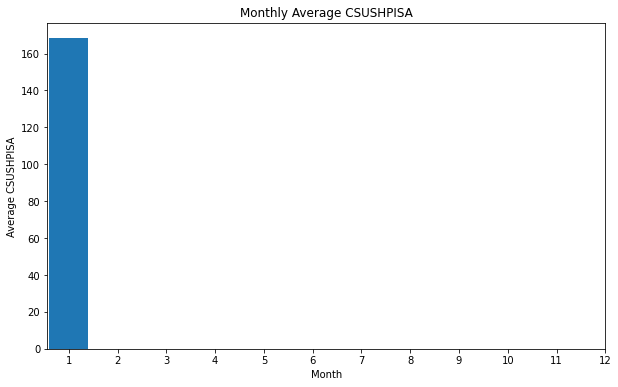

In [57]:
# Extracting year, month, day, etc. from the datetime index
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

# Plotting extracted data (e.g., monthly distribution)
monthly_means = df.groupby('Month')['CSUSHPISA'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_means.index, monthly_means)
plt.xlabel('Month')
plt.ylabel('Average CSUSHPISA')
plt.title('Monthly Average CSUSHPISA')
plt.xticks(range(1, 13))
plt.show()

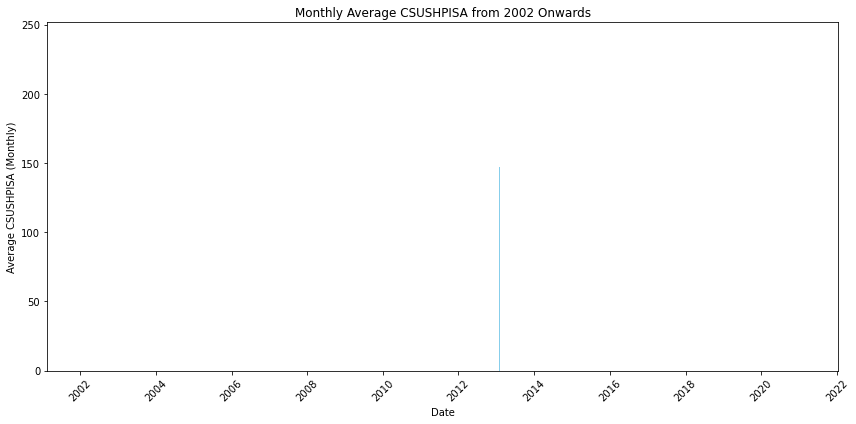

In [58]:
# Filtering data from 2002 onwards
df_from_2002 = df[df.index.year >= 2002]

# Resampling to a different frequency (e.g., monthly)
df_monthly = df_from_2002['CSUSHPISA'].resample('M').mean()

# Plotting the resampled data using Matplotlib directly
plt.figure(figsize=(12, 6))
plt.bar(df_monthly.index, df_monthly, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Average CSUSHPISA (Monthly)')
plt.title('Monthly Average CSUSHPISA from 2002 Onwards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series forecasting model training

In [59]:
#storing independent variables columns name in features1 and target variable in target for further process
features1= ['UNRATE', 'Per_Capita_GDP', 'INTDSRUSM193N', 'CPI', 'Subsidy', 'housing units',  'Median sales']
target = 'CSUSHPISA'

In [60]:
#Preparing traing and testing data
X_train = train_f[features1]
y_train = train_f[target]

X_test = test_f[features1]
y_testn = test_f[target]
     

# Use XGBRegressor to train anf forecast Home price index.

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming your DataFrame has a different target column name
X = df.drop('CSUSHPISA', axis=1)  # Features
y = df['CSUSHPISA']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing - handle missing values if needed
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and fit the XGBoost model
forecast_reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
forecast_reg.fit(X_train_imputed, y_train, eval_set=[(X_train_imputed, y_train), (X_test_imputed, y_test)], verbose=100)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing - handle missing values if needed
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and fit the XGBoost model
forecast_reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
forecast_reg.fit(X_train_imputed, y_train, eval_set=[(X_train_imputed, y_train), (X_test_imputed, y_test)], verbose=100)

[0]	validation_0-rmse:170.64370	validation_1-rmse:162.10634
[100]	validation_0-rmse:70.80779	validation_1-rmse:65.31495
[200]	validation_0-rmse:32.15981	validation_1-rmse:24.76510
[300]	validation_0-rmse:15.91738	validation_1-rmse:12.38887
[386]	validation_0-rmse:9.38800	validation_1-rmse:12.70656
[0]	validation_0-rmse:170.64370	validation_1-rmse:162.10634
[100]	validation_0-rmse:70.80779	validation_1-rmse:65.31495
[200]	validation_0-rmse:32.15981	validation_1-rmse:24.76510
[300]	validation_0-rmse:15.91738	validation_1-rmse:12.38887
[385]	validation_0-rmse:9.44289	validation_1-rmse:12.69528


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

# Feature importance

[0]	validation_0-rmse:170.64370	validation_1-rmse:162.10634
[100]	validation_0-rmse:70.80779	validation_1-rmse:65.31495
[200]	validation_0-rmse:32.15981	validation_1-rmse:24.76510
[300]	validation_0-rmse:15.91738	validation_1-rmse:12.38887
[386]	validation_0-rmse:9.38800	validation_1-rmse:12.70656


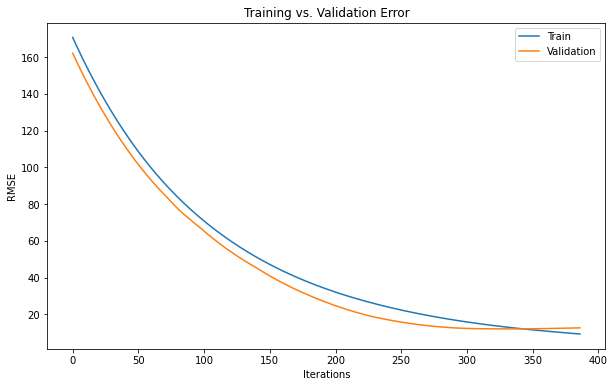

In [64]:
# Fit the model with eval_set as you've specified
eval_set = [(X_train_imputed, y_train), (X_test_imputed, y_test)]

forecast_reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
forecast_reg.fit(X_train_imputed, y_train, eval_set=eval_set, verbose=100)

# Retrieve evaluation results
results = forecast_reg.evals_result()

# Plotting training and validation error
train_error = results['validation_0']['rmse']  # Training error
val_error = results['validation_1']['rmse']  # Validation error

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_error, label='Train')
plt.plot(val_error, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Error')
plt.legend()
plt.show()

# Forecast on test data

In [65]:
# Predict on the test set
predictions = forecast_reg.predict(X_test_imputed)

# Create a new DataFrame to hold the predictions
predictions_df = pd.DataFrame(predictions, columns=['prediction'], index=X_test.index)

# Merge the predictions with the original DataFrame df
df_f = df.merge(predictions_df, how='left', left_index=True, right_index=True)


# Let's plot and visualize the forecasted data

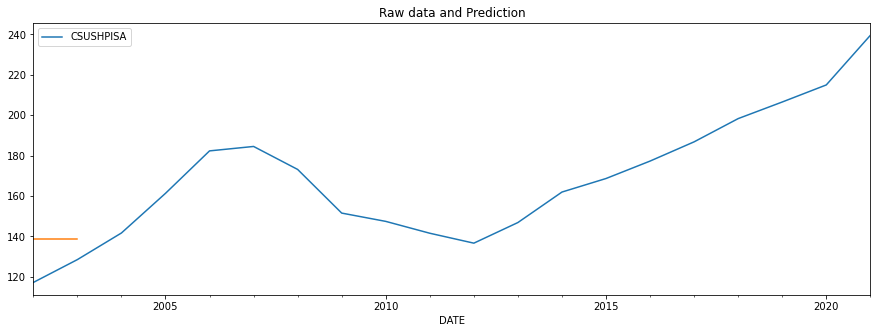

In [66]:
#Plot CSUSHPISA and forecasted CSUSHPISA for comparison
ax = df_f[['CSUSHPISA']].plot(figsize=(15,5))
df_f['prediction'].plot(ax=ax,style="-")
ax.set_title('Raw data and Prediction')
plt.show()

In [67]:

# Assuming 'test_f' contains the actual target values 'CSUSHPISA' and the predicted values from the model
# Check if 'CSUSHPISA' and 'prediction' columns exist in the DataFrame
if 'CSUSHPISA' in test_f.columns and 'prediction' in test_f.columns:
    score = np.sqrt(mean_squared_error(test_f['CSUSHPISA'], test_f['prediction']))
    print(f'RMSE score on test set: {score}')
else:
    print("Column names not found in the DataFrame.")

Column names not found in the DataFrame.


# AS we can see the forecasting model is not so good, RMSE is quiet high around 58.5
Let's make an ARIMA model to forecast the Home price index (CSUSHPISA)

sm.tsa.seasonal_decompose refers to the seasonal decomposition of a time series using the seasonal_decompose function from the statsmodels library in Python. This function is part of the Time Series Analysis (TSA) module within statsmodels.

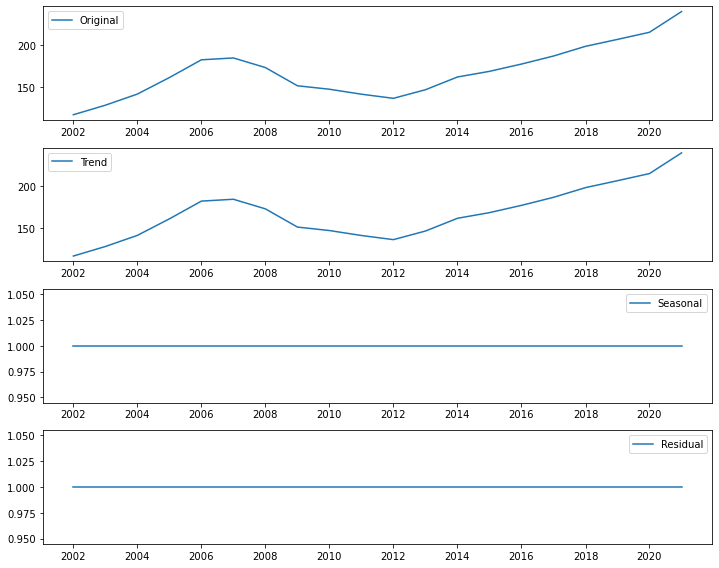

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'df' contains a time series named 'CSUSHPISA'
result = seasonal_decompose(df['CSUSHPISA'], model='multiplicative', period=1)

# Plotting each component separately
plt.figure(figsize=(10,8))

# Plotting the observed data
plt.subplot(411)
plt.plot(df['CSUSHPISA'], label='Original')
plt.legend()

# Plotting the trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

# Plotting the seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

# Plotting the residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

USE adfuller function from the statsmodels.tsa.stattools module is used for performing the Augmented Dickey-Fuller unit root test, which is a statistical test commonly used in time series analysis to determine whether a univariate time series has a unit root

In [69]:
# import adfuller statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['CSUSHPISA'])

print('ADF STATS: %f' %result[0])
print('p_value: %f' %result[1])
print('critical values:')

for key, value in result[4].items():
  print('\t%s: %.3f' %(key, value))

  if result[0] < result[4]["5%"]:
    print("reject")

  else:
    print("time series is not stats")

ADF STATS: 0.404654
p_value: 0.981668
critical values:
	1%: -4.223
time series is not stats
	5%: -3.189
time series is not stats
	10%: -2.730
time series is not stats


the null hypothesis of the ADF test is that the time series has a unit root and is non-stationary.

If the p-value is less than or equal to your chosen significance level (commonly 0.05), you would reject the null hypothesis.

the p-value is 0.737449, which is greater than 0.05.

The ADF statistic of -1.042502 is greater (in absolute value) than the critical values at 1%, 5%, and 10%.

The interpretation is that there is not enough evidence to suggest that the time series is stationary

# Import plot_acf function from the statsmodels.graphics.tsaplots module to visualize the autocorrelation function (ACF) and Seasonal patterns of a time series.

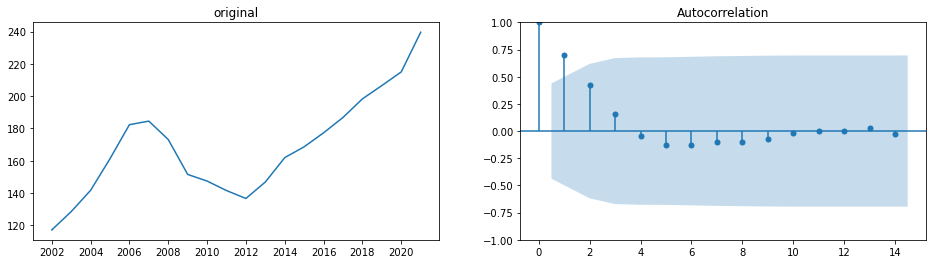

In [70]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(df.CSUSHPISA)
ax1.set_title('original')

plot_acf(df.CSUSHPISA, ax=ax2);

Shaded Region:

The shaded region in the plot indicates the confidence interval. If the autocorrelation coefficient crosses this region, it may be considered statistically significant.

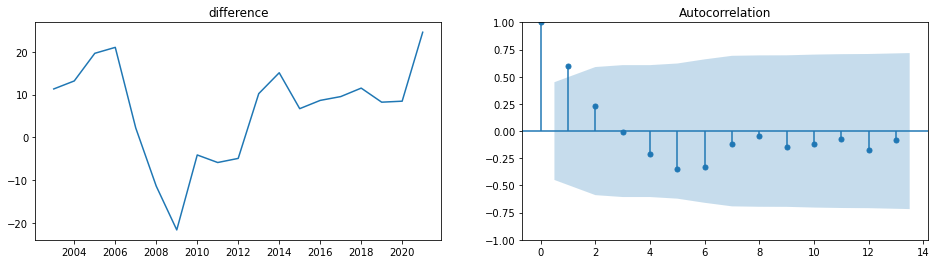

In [71]:
difference = df.CSUSHPISA.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(difference)
ax1.set_title('difference')

plot_acf(difference, ax=ax2);

diff() method and then removes any NaN values with .dropna(). The resulting difference series represents the changes between consecutive observations.

The left plot (ax1) displays the differenced time series, and the right plot (ax2) shows the autocorrelation function (ACF) plot of the differenced series

The ACF plot on the right side provides insights into the autocorrelation structure of the differenced time series

# Let's train ARIMA model on df.CSUSHPISA

No frequency information was provided, so inferred frequency AS-JAN will be used.
No frequency information was provided, so inferred frequency AS-JAN will be used.
No frequency information was provided, so inferred frequency AS-JAN will be used.


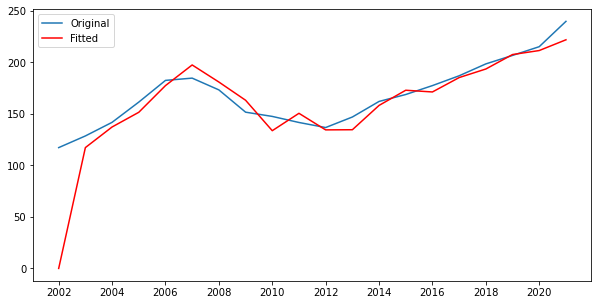

                               SARIMAX Results                                
Dep. Variable:              CSUSHPISA   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -68.367
Date:                Wed, 13 Dec 2023   AIC                            142.734
Time:                        13:43:28   BIC                            145.567
Sample:                    01-01-2002   HQIC                           143.213
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6157      0.242      2.541      0.011       0.141       1.091
ma.L1          0.4007      0.320      1.252      0.211      -0.227       1.028
sigma2        73.7907     31.524      2.341      0.0

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure 'df' contains your time series data 'CSUSHPISA'
# Assuming 'df' doesn't have missing values or NaNs

# Check if differencing is needd
# If your data is not stationary, apply differencing
# df['CSUSHPISA_diff'] = df['CSUSHPISA'].diff().dropna()

# Try fitting the ARIMA model with different parameters
model = ARIMA(df['CSUSHPISA'], order=(1, 1, 1))  # Change order if needed
results_ARIMA = model.fit()

# Plot original data and fitted values
plt.figure(figsize=(10,5))
plt.plot(df['CSUSHPISA'], label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.show()

# Check diagnostic summary of the model
print(results_ARIMA.summary())

We can observe that during the month of spike in df.CSUSHPISA model's prediction is bit offset, but rest of the month it predicted very well. Now let's train another time series model which is SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors)

# We can observe that model trained very well on df.CSUSHPISA

In [73]:
# Importing DateOffset from pandas.tseries.offsets to handle date offsets
# This is used for generating date ranges with specific offsets, such as shifting dates forward or backward.
from pandas.tseries.offsets import DateOffset
df.index = pd.to_datetime(df.index)
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,12)]

# Update the 'forecast' column in future_dates_df with the predictions
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
print (df)

            CSUSHPISA  Year  Month  Per_Capita_GDP  UNRATE      CPI  \
DATE                                                                  
2002-01-01    117.144  2002      1         50091.0     5.7  177.700   
2003-01-01    128.461  2003      1         50462.0     5.8  182.600   
2004-01-01    141.646  2004      1         52179.0     5.7  186.300   
2005-01-01    161.288  2005      1         53719.0     5.3  191.600   
2006-01-01    182.321  2006      1         54927.0     4.7  199.300   
2007-01-01    184.517  2007      1         55260.0     4.6  203.437   
2008-01-01    173.132  2008      1         55497.0     5.0  212.174   
2009-01-01    151.507  2009      1         53221.0     7.8  211.933   
2010-01-01    147.396  2010      1         53683.0     9.8  217.488   
2011-01-01    141.521  2011      1         54341.0     9.1  221.187   
2012-01-01    136.607  2012      1         55342.0     8.3  227.842   
2013-01-01    146.827  2013      1         55859.0     8.0  231.679   
2014-0

# Now let's forecast Home price index for 12 months

In [74]:
#concat future_dates_df and df for forecating the data in future
future_df = pd.concat([df, future_dates_df])
print (df)

            CSUSHPISA  Year  Month  Per_Capita_GDP  UNRATE      CPI  \
DATE                                                                  
2002-01-01    117.144  2002      1         50091.0     5.7  177.700   
2003-01-01    128.461  2003      1         50462.0     5.8  182.600   
2004-01-01    141.646  2004      1         52179.0     5.7  186.300   
2005-01-01    161.288  2005      1         53719.0     5.3  191.600   
2006-01-01    182.321  2006      1         54927.0     4.7  199.300   
2007-01-01    184.517  2007      1         55260.0     4.6  203.437   
2008-01-01    173.132  2008      1         55497.0     5.0  212.174   
2009-01-01    151.507  2009      1         53221.0     7.8  211.933   
2010-01-01    147.396  2010      1         53683.0     9.8  217.488   
2011-01-01    141.521  2011      1         54341.0     9.1  221.187   
2012-01-01    136.607  2012      1         55342.0     8.3  227.842   
2013-01-01    146.827  2013      1         55859.0     8.0  231.679   
2014-0

Plot the original time series and the forecast from index 251 onwards for 12 months

No frequency information was provided, so inferred frequency AS-JAN will be used.
No frequency information was provided, so inferred frequency AS-JAN will be used.
Maximum Likelihood optimization failed to converge. Check mle_retvals


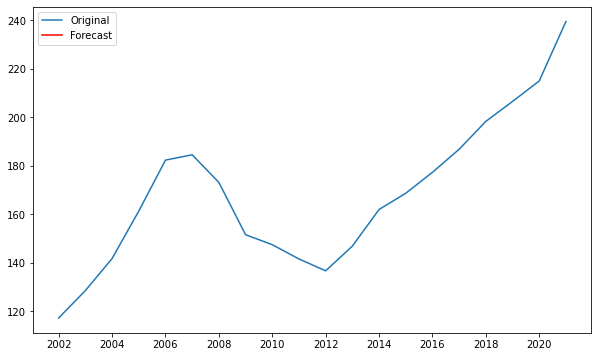

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df is your DataFrame and 'CSUSHPISA' is a valid column
# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(df['CSUSHPISA'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generate forecast values
forecast = results.get_forecast(steps=13)

# Create a DataFrame for forecast values
forecast_index = pd.date_range(start=df.index[-1], periods=14, freq='M')[1:]
forecast_values = forecast.predicted_mean
forecast_df = pd.DataFrame({'CSUSHPISA': forecast_values}, index=forecast_index)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['CSUSHPISA'], label='Original')
plt.plot(forecast_df, label='Forecast', color='red')
plt.legend()
plt.show()

# By looking at the forecast data according to SARIMA model for next 12 months Home price index will go down slight

# Conclusion
Forecasting model is not that reliable, so we'll use predictive model for this project as final model.
IN this project we are taking R2 score as evaluation metric because of Simplicity of Interpretation.

Though Decision tree regressor has highest R2 score but for this project we'll consider Randomforest Regressor model as final model.

Because Randomforest is a low variance and low bias model.